### Demo contents
#### Matplotlib
* draw a figure
* show diagram from general usage (Figure, Axes, Axis, Artist)
* show high-level API (state machine like)
    * functions on plt
    * subplots
    * xlabel, xlim
    * title, legends
    * some other ready-to-use functions
        * hist, boxplot, barchart
        * autocorrelation
* show OO approach
    * methods on each of Figure, Axes, Axis, Annotations
* some examples with styles

#### Pandas visualization
* it builds on matplotlib
* some methods on DataFrame related to plotting 
    * individual or
    * multiple columns
* how to reuse mpl API

#### Seaborn usage
* facetting
* several ready-to-use plots useful in stat

#### Bokeh usage
* interactivity
* linked brushing


## Usage in jupyter notebook

In [1]:
## INIT: usual way to display plots inline and import the matplotlib library
%matplotlib inline

# default value is 'tight', can be made more relaxed about spacing
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

import numpy as np
import matplotlib.pyplot as plt

# set the format of the embedded figures (specific to the 'inline' backend)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png','svg')

### Simple 2-plot figure with title and labels

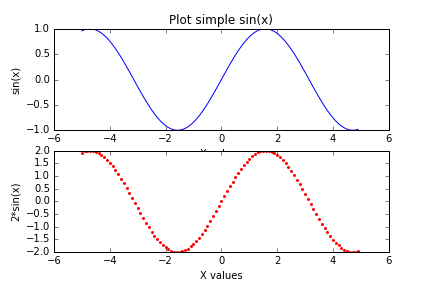

In [2]:
## generate some dummy data
x = np.arange(-5, 5, .1)
y = np.sin(x)

## let's create two plots in a row 
# define the 2 plots, use the 1st as active
plt.subplot(2, 1, 1)
plt.plot(x,y)
plt.xlabel("X values")
plt.ylabel("sin(x)")
plt.title("Plot simple sin(x)")
# activate the 2nd plot within the figure
plt.subplot(2, 1, 2)
plt.plot(x, 2*y, "ro", markersize=3, markeredgecolor='none')
plt.xlabel("X values")
# ,bbox=dict(facecolor='red', alpha=0.3), x=0, y=-.2 ;
plt.ylabel("2*sin(x)");

### Main concepts in Matplotlib
![test](./figs/matplotlib_fig_map.png)

Source: http://matplotlib.org/1.5.1/faq/usage_faq.html#parts-of-a-figure

- Figure (`matplotlib.figure.Figure`)
> top level container for all plot elements
- Axes (`matplotlib.axes._axes.Axes`)
> The `Axes` contains most of the figure elements:
> `~matplotlib.axis.Axis`, `~matplotlib.axis.Tick`,
> `~matplotlib.lines.Line2D`, `~matplotlib.text.Text`,
> `~matplotlib.patches.Polygon`, etc., and sets the
> coordinate system.
- Axis and Tick (`matplotlib.axis.Axis` and `matplotlib.axis.Tick`)
> It represents the axis within the plot, sets the limits and controls 
> how the ticks are displayed (formatting, minor and major ticks)

### *State-machine* behaviour (from command line) 

In [3]:
# set the backend to osx (on Mac, would be different on other OS...)
%matplotlib 

Using matplotlib backend: MacOSX


#### Get some data

In [4]:
import pandas as pd
houses = pd.read_csv(filepath_or_buffer='bp_flats.csv')
houses.head(10)

,Flatcount,1946,1960,1970,1980,1990,2000,2005,2011,District
0,1,57,9,10,5,9,6,1,1,1
1,2,44,6,2,1,3,1,0,1,1
2,3,36,2,4,3,2,2,0,1,1
3,4,54,3,4,2,1,1,2,0,1
4,5-10,240,21,60,28,15,13,2,4,1
5,11-20,231,21,80,26,14,13,3,4,1
6,21-50,151,14,32,7,3,9,5,1,1
7,51-,16,1,1,1,1,0,0,0,1
8,1,1170,343,440,925,1648,1482,524,333,2
9,2,431,88,116,246,285,159,39,37,2


In [30]:
small_flats = houses[ houses['Flatcount'].isin(['1', '2']) ]\
.groupby('District').sum()
small_flats.head()

,1946,1960,1970,1980,1990,2000,2005,2011
District,,,,,,,,
1,101,15,12,6,12,7,1,2
2,1601,431,556,1171,1933,1641,563,370
3,1816,861,936,797,1199,1448,837,473
4,1443,980,355,156,283,397,277,124
5,11,0,0,0,0,0,0,0


#### Simple plots (with default backend)

In [7]:
%matplotlib
plt.isinteractive()

Using matplotlib backend: MacOSX


True

In [8]:
plt.figure()

In [11]:
plt.show()

In [10]:
## create 3 different figures to compare the number of small houses at 3 
## things to show: use figure(), hist() and show()
plt.hist(small_flats['2000'].values, bins=15)
plt.title("# small houses in 2000")
plt.show();

In [12]:
plt.figure()
plt.hist(small_flats['2005'].values, bins=15, color="g")
plt.title("# small houses in 2005")
plt.show()

Okay, it is far from ideal to compare distributions on separate figures... Try subplots...

In [13]:
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)

In [14]:
plt.hist(small_flats['2005'].values, color='g', bins=15)

(array([ 7.,  2.,  3.,  3.,  2.,  0.,  1.,  1.,  0.,  2.,  0.,  0.,  1.,
         0.,  1.]),
 array([    0. ,    91.2,   182.4,   273.6,   364.8,   456. ,   547.2,
          638.4,   729.6,   820.8,   912. ,  1003.2,  1094.4,  1185.6,
         1276.8,  1368. ]),
 <a list of 15 Patch objects>)

In [15]:
plt.title("# of houses in 2005")
plt.xlabel("# of houses with 1 or 2 flats")

In [ ]:
plt.show()

In [16]:
plt.subplot(2,1,2)
plt.title("# of houses in 2011");

Well, that's a bit clumsy with the overlaps...

In [17]:
plt.subplots_adjust(hspace=.4)
plt.show()

In [18]:
plt.hist(small_flats['2011'].values, color='lightgreen', bins=15)
plt.show()

In [21]:
plt.subplot(2,1,1)
xmin1, xmax1 = plt.xlim()
print("x limits on first plot", (xmin1, xmax1))
plt.subplot(2,1,2)
print("x limits on first plot", plt.xlim())

x limits on first plot (0.0, 1400.0)
x limits on first plot (0.0, 1200.0)


In [22]:
plt.xlim(xmin1,xmax1)
plt.show()

Well, well, good idea but it just does not work out (same number of bins but different width)... try something different.

In [25]:
plt.gcf()
plt.show()

In [26]:
# close current figure
plt.close()
# switch to inline plotting
%matplotlib inline
set_matplotlib_formats('pdf', 'png', 'svg')

### OO interfaces

(array([ 9.,  5.,  3.,  1.,  1.,  2.,  0.,  1.,  0.,  1.]),
 array([   0,  150,  300,  450,  600,  750,  900, 1050, 1200, 1350, 1500]),
 <a list of 10 Patch objects>)

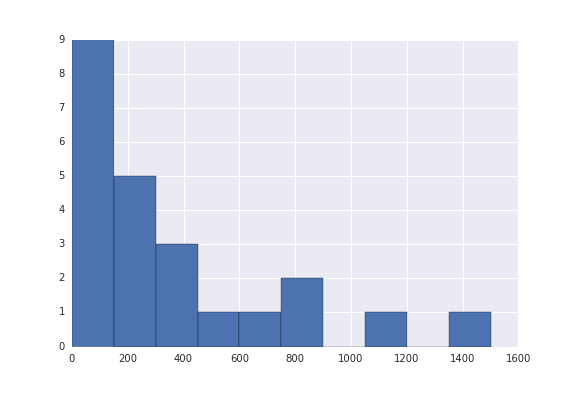

In [38]:
plt.hist(small_flats['2005'], bins=common_bins)

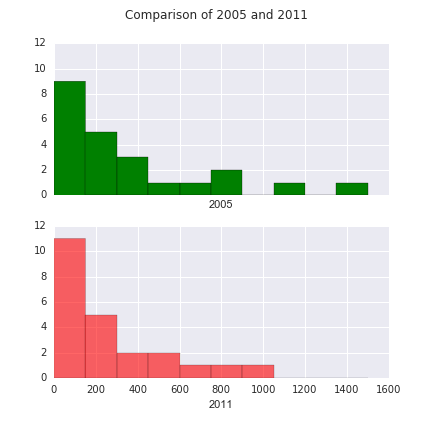

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, 
                        figsize=(6,6))
common_bins = np.arange(
    np.min(small_flats[['2005','2011']].values), 
    np.max(small_flats[['2005','2011']].values) + 150, 150)

ax0 = axes[0]
ax0.hist(small_flats['2005'], bins=common_bins, color="g")
ax0.set_xlabel("2005")

ax1 = axes[1]
ax1.hist(small_flats['2011'], bins=common_bins, color="r", alpha=.6)
ax1.set_xlabel("2011")

fig.suptitle("Comparison of 2005 and 2011");

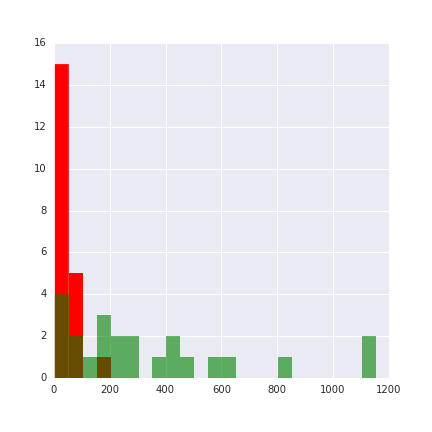

In [45]:
## compare the distrib of 1 or 2 flat houses to 1-flat houses
fig = plt.figure(figsize=(6,6))
large_houses = houses[ houses['Flatcount'].isin(['2','21-50']) ].groupby(
    'District').sum()
bydistrict = houses.groupby("District").sum()

year_of_interest = '2011'

#
common_bins = np.arange(bydistrict[year_of_interest].values.min(),
                        bydistrict[year_of_interest].values.max()+50,50)

plt.hist(large_houses[year_of_interest].values, bins=common_bins, 
         color="red", edgecolor='none')
plt.hist(bydistrict[year_of_interest].values, bins=common_bins, 
         color="green", alpha=.6,  edgecolor='none');

In [46]:
houses.head()

,Flatcount,1946,1960,1970,1980,1990,2000,2005,2011,District
0,1,57,9,10,5,9,6,1,1,1
1,2,44,6,2,1,3,1,0,1,1
2,3,36,2,4,3,2,2,0,1,1
3,4,54,3,4,2,1,1,2,0,1
4,5-10,240,21,60,28,15,13,2,4,1


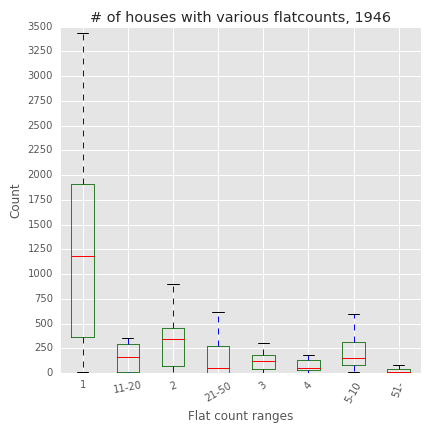

In [78]:
# collect some data
vals = []
labels = []
for k, group in houses.groupby('Flatcount'):
    labels.append(k)
    vals.append(group["1946"].values)

fig = plt.figure(figsize=(6,6))
ax = fig.gca()

ax.boxplot(vals, labels=labels, 
           boxprops=dict(color="darkgreen",linewidth=.8));

ax.set_title("# of houses with various flatcounts, 1946")
ax.set_xlabel("Flat count ranges")
ax.set_ylabel("Count")
# set the y tick on each 250
ax.set_yticks(ticks=np.arange(0, np.max(vals)+250, 250));
for i,xtick in enumerate(ax.get_xticklabels()):
    xtick.set_rotation(i*10)

## account for the layout changes caused by rotating labels on x axis
fig.tight_layout()

### More on labels and legends

In [51]:
bydistrict = houses.groupby("District").sum()
bydistrict.head()

,1946,1960,1970,1980,1990,2000,2005,2011
District,,,,,,,,
1,829,77,193,73,48,45,13,12
2,3133,584,1096,1952,2418,1957,777,482
3,2340,1000,1111,1413,1911,1607,1129,642
4,2234,1121,471,460,1002,526,499,228
5,762,19,12,1,3,1,2,3


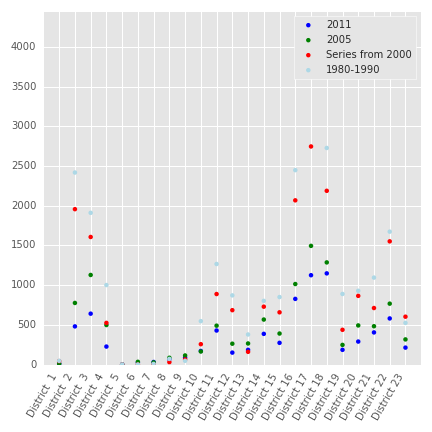

In [77]:
plt.figure(figsize=(6,6))
mk = "o"
plt.scatter(x=bydistrict.index, 
            y=bydistrict['2011'], 
            edgecolor='none', 
            marker=mk)
plt.scatter(bydistrict.index, bydistrict['2005'], c="g", 
            edgecolor='none', marker=mk)
## Note the missing label and .values()
plt.scatter(bydistrict.index, 
            bydistrict['2000'].values, c="r", edgecolor='none',
            marker=mk, label="Series from 2000") 
plt.scatter(bydistrict.index, 
            bydistrict['1990'], c="lightblue", edgecolor='none', 
            label="1980-1990", marker=mk)

plt.xlim(0,24)
plt.ylim(0,np.max(bydistrict.values))

plt.xticks(np.arange(1,24), 
           ["District %2s" % i for i in bydistrict.index])

# 
for xtick in plt.gca().get_xticklabels():
    xtick.set_rotation(60)
    xtick.set_horizontalalignment('right')

plt.legend( fontsize='medium',  frameon=True)

# just to make sure the 
plt.tight_layout()

### Let's create a heatmap :)

In [61]:
print(bydistrict)

          1946  1960  1970  1980  1990  2000  2005  2011
District                                                
1          829    77   193    73    48    45    13    12
2         3133   584  1096  1952  2418  1957   777   482
3         2340  1000  1111  1413  1911  1607  1129   642
4         2234  1121   471   460  1002   526   499   228
5          762    19    12     1     3     1     2     3
6         1060    10     8     2     3     2    36    27
7         1198     3     9     0    10     2    29    34
8         1541    53    20    53    73    32    87    69
9          824    84   342    43    49    66   116    89
10        1433   736   522   534   548   258   166   173
11        2883  1146  1493  1261  1267   889   491   430
12        2107   336   798  1035   872   686   264   152
13        1734   612   220   229   380   162   267   187
14        3421  1617  1367   879   803   730   568   388
15        4453  1596  1162   999   851   659   392   275
16        4084  2133  2614  276

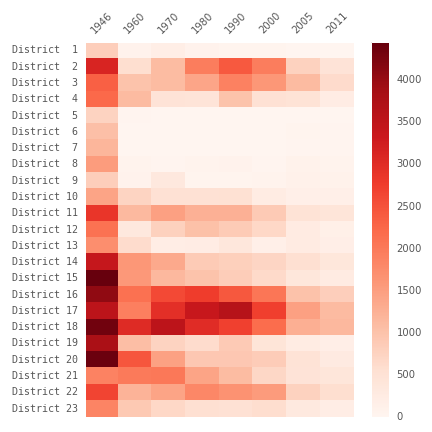

In [76]:
fig = plt.figure(figsize=(6,6))
ax = plt.gca()
plt.pcolormesh(bydistrict.values, cmap=plt.cm.Reds)
ax.xaxis.tick_top()

plt.colorbar(orientation='vertical')

# we don't need the frame just now
ax.set_frame_on(True)
# set the y limit explicitly (otherwise it's gonna be 
# longer than needed)
ax.set_ylim(0, np.max(bydistrict.index.values))

# shift the ticks by .5 unit
ax.set_yticks(np.arange(bydistrict.shape[0]) + .5);
ax.set_xticks(np.arange(bydistrict.shape[1]) + .5)
# invert the otherwise sorted y axis
ax.invert_yaxis()

# create the labels for the major ticks
xlabels = bydistrict.columns.values
ylabels = ["District %2s" % i for i in bydistrict.index]

# set up labels on the two axes
ax.set_xticklabels(xlabels, minor=False)
ax.set_yticklabels(ylabels, family="monospace",
                   minor=False, fontstretch='extra-condensed')

# rotate the
plt.xticks(rotation=45)

# # just to be sure, switch it off
ax.grid(False)

for xt in ax.xaxis.get_major_ticks():
    xt.tick1On = False
    xt.tick2On = False
for yt in ax.yaxis.get_major_ticks():
    yt.tick1On = False
    yt.tick2On = False

    
fig.tight_layout()

### Styling within Matplotlib
- predefined settings for default values (rcParams)
- [Very good official description](http://matplotlib.org/users/style_sheets.html)



In [73]:
!find ~/anaconda/ -name "*.mplstyle"

/Users/urbi/anaconda//lib/python3.5/site-packages/matplotlib/mpl-data/stylelib/bmh.mplstyle
/Users/urbi/anaconda//lib/python3.5/site-packages/matplotlib/mpl-data/stylelib/classic.mplstyle
/Users/urbi/anaconda//lib/python3.5/site-packages/matplotlib/mpl-data/stylelib/dark_background.mplstyle
/Users/urbi/anaconda//lib/python3.5/site-packages/matplotlib/mpl-data/stylelib/fivethirtyeight.mplstyle
/Users/urbi/anaconda//lib/python3.5/site-packages/matplotlib/mpl-data/stylelib/ggplot.mplstyle
/Users/urbi/anaconda//lib/python3.5/site-packages/matplotlib/mpl-data/stylelib/grayscale.mplstyle
/Users/urbi/anaconda//lib/python3.5/site-packages/matplotlib/mpl-data/stylelib/seaborn-bright.mplstyle
/Users/urbi/anaconda//lib/python3.5/site-packages/matplotlib/mpl-data/stylelib/seaborn-colorblind.mplstyle
/Users/urbi/anaconda//lib/python3.5/site-packages/matplotlib/mpl-data/stylelib/seaborn-dark-palette.mplstyle
/Users/urbi/anaconda//lib/python3.5/site-packages/matplotlib/mpl-data/stylelib/seaborn-dark.

In [74]:
plt.style.available

['seaborn-dark',
 'seaborn-colorblind',
 'dark_background',
 'ggplot',
 'seaborn-pastel',
 'fivethirtyeight',
 'seaborn-muted',
 'seaborn-white',
 'seaborn-bright',
 'seaborn-notebook',
 'seaborn-paper',
 'classic',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'bmh',
 'seaborn-talk',
 'seaborn-deep',
 'grayscale',
 'seaborn-poster',
 'seaborn-whitegrid',
 'seaborn-dark-palette']

In [79]:
# plt.style.use('ggplot')
## re-plot something from the previous cells
plt.style.use('default')

In [80]:
# due to ipython and inline backend, it is not enough 
# to set back the 'default' style, it uses its own rcParams
%matplotlib inline
# see matplotlib.rcParams

## Pandas visualization
- matplotlib is still rather low-level API
    - need to provide the points (as array)
    - need to specify the details of the plots, such label names, colors, etc.
- Pandas provides some functions to ease the plotting of `DataFrame`s

In [81]:
import pandas as pd # was already imported

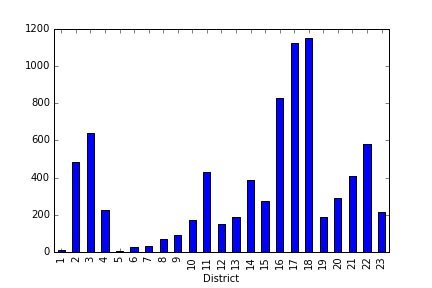

In [83]:
# plot a simple barchart of one of the columns
bydistrict['2011'].plot(kind='bar')

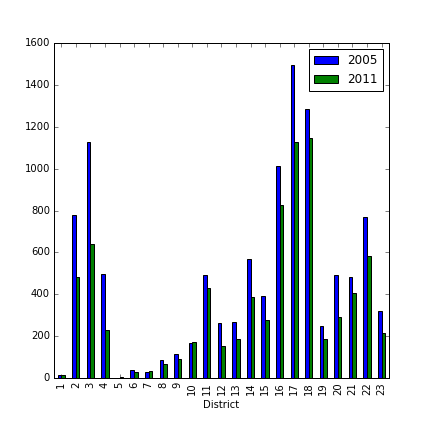

In [86]:
# what happens when multiple columns are passed at the same time?
bydistrict[['2005','2011']].plot.bar(figsize=(6,6), legend=True)

In [ ]:
# there are various type of plots supported
help(pd.DataFrame.plot)

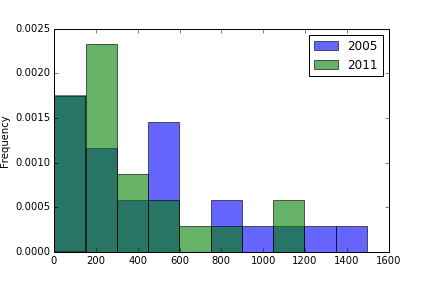

In [87]:
# let's check out a histogram of two columns
bydistrict[['2005','2011']].plot.hist(normed=True, alpha=.6)

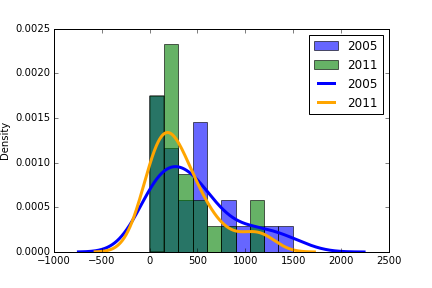

In [88]:
## would be nice to see the density plot as well
# save the Axes object
hist_ax = bydistrict[['2005','2011']].plot.hist(
    normed=True, alpha=.6, color=["blue",'green'])
# reuse the axes object by passing in as 'ax'
bydistrict[['2005','2011']].plot.kde(ax=hist_ax, 
                                     color=["blue", "orange"], 
                                     linewidth=3,)

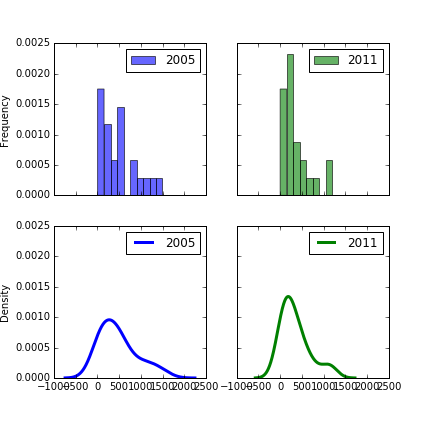

In [90]:
# more complex use of mpl library
fig, axes = plt.subplots(2,2, figsize=(6,6), sharex=True, sharey=True)

bydistrict[['2005','2011']].plot.hist(subplots=True, normed=True, 
                                      alpha=.6, color=["blue",'green'],
                                      ax = [axes[0,0], axes[0,1]])
bydistrict[['2005','2011']].plot.kde(subplots=True, 
                                     color=["blue", "green"], linewidth=3,
                                     ax = [axes[1,0], axes[1,1]]);

## Seaborn

In [91]:
import seaborn as sns

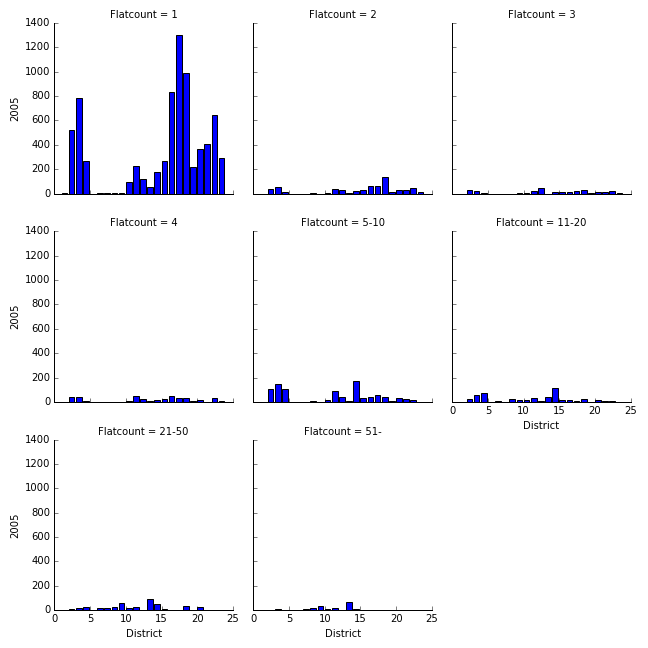

In [92]:
# create a facet grid based on one variable ('Flatcount')
grid = sns.FacetGrid(data=houses,col="Flatcount", col_wrap=3, 
                     sharex=True, sharey=True)
# and for each slice draw a barchart from District number 
# and the count houses in 2011 
grid.map(plt.bar,"District",'2005');

/Users/urbi/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:2296: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


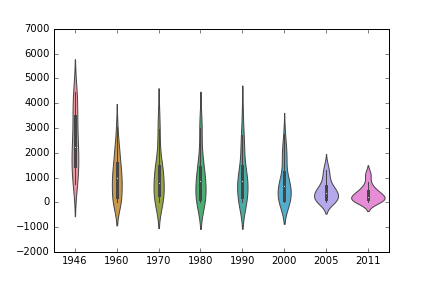

In [93]:
sns.violinplot(bydistrict)